In [1]:
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import numpy as np

# 3.1 CHALLENGE - IS AMD MEAN RETURN HIGHER THAN INTEL MEAN RETURN?

Do a t-test to check whether the mean monthly cc return of AMD (AMD) is greater than the mean monthly return of Intel. Use data from Jan 2017 to date.

In [2]:
# Collecting the real data from currency of AMD and INTC
AMD = pdr.get_data_yahoo("AMD", start = "01/01/2017", end = "08/15/2022", interval = "m")
AMD = AMD["Adj Close"]
INTC = pdr.get_data_yahoo("INTC", start = "01/01/2017", end = "08/15/2022", interval = "m")
INTC = INTC["Adj Close"]

In [3]:
# Calculating the monthly cc returns
ccr_AMD = np.log(AMD) - np.log(AMD.shift(1))
ccr_AMD = ccr_AMD.dropna()
ccr_INTC = np.log(INTC) - np.log(INTC.shift(1))
ccr_INTC = ccr_INTC.dropna()
print("AMD CCr: ", ccr_AMD, " INTC CCr: ", ccr_INTC)

AMD CCr:  Date
2017-02-01    0.332469
2017-03-01    0.006205
2017-04-01   -0.089827
2017-05-01   -0.172744
2017-06-01    0.109107
                ...   
2022-04-01   -0.245712
2022-05-01    0.174849
2022-06-01   -0.286701
2022-07-01    0.211384
2022-08-01    0.015545
Name: Adj Close, Length: 67, dtype: float64  INTC CCr:  Date
2017-02-01   -0.016982
2017-03-01    0.003516
2017-04-01    0.002215
2017-05-01   -0.001107
2017-06-01   -0.060474
                ...   
2022-04-01   -0.128356
2022-05-01    0.018862
2022-06-01   -0.163878
2022-07-01   -0.029845
2022-08-01   -0.025947
Name: Adj Close, Length: 67, dtype: float64


In [4]:
# Calculating the mean of the cc returns
AMD_mean = ccr_AMD.mean()
INTC_mean = ccr_INTC.mean()
print(f"AMD mean: {AMD_mean}, INTC mean: {INTC_mean}")

AMD mean: 0.03320761461854227, INTC mean: 0.0015393377548358412


In [5]:
# Calculating the variance of the cc returns
N = ccr_AMD.count()
AMD_var = ccr_AMD.var()
INTC_var = ccr_INTC.var()
print(f"AMD var: {AMD_var}, INTC var: {INTC_var}")

AMD var: 0.026250250294288773, INTC var: 0.005644974683267443


In [6]:
# H0: (mean(rAMD) - mean(rINTEL)) = 0
# Ha: (mean(rAMD) - mean(rINTEL)) <> 0

# Calculating the standard error of the difference of the means
t = (AMD_mean - INTC_mean - 0) / np.sqrt((1/N) * (AMD_var + INTC_var))
t

1.4514397059536874

SINCE THE DIFFERENCE OF THE MEANS OF THE CC RETURNS IS ONLY 1.45 STANDARD DEVIATIONS, WE CANNOT ASSUME THAT NEITHER OF THE HYPOTHESIS ARE CORRECT. THE T-RESULT DEMONSTRATES THAT THE MEAN OF AMD IS JUST 1.45 STANDARD DEVIATIONS AWAY FROM THE INTEL'S, WHICH REPRESENTS LESS THAN THE 95% OF THE CASES. 

In [7]:
# Calculating the pvalue from the t-Statistic
from scipy import stats as st

# the degrees of freedom for 2-independent-means t-test is calculated with the following formula:
df = ( ((N-1) / N**2) * (AMD_var + INTC_var)**2  / ( (AMD_var/N)**2 + (INTC_var/N)**2  ) )
print(f"Degrees of freedom: {df}")
pvalue = 2 * st.t.sf(np.abs(t), df)
print(f"2-tailed pvalue: {pvalue}")

Degrees of freedom: 93.13122638271791
2-tailed pvalue: 0.1500177587254462


In [8]:
# Using the ttest function from stats to calculate the t value and the 2-tailed p-value
st.ttest_ind(ccr_AMD,ccr_INTC,equal_var=False)

Ttest_indResult(statistic=1.4514397059536877, pvalue=0.1500177587254462)

In [9]:
import researchpy as rp
# Using the ttest function from researchpy:
rp.ttest(ccr_AMD,ccr_INTC, equal_variances = False)
# We got the same result as above!
# With this function we avoid calculating all steps of the hypothesis test!

C:\Users\myros\anaconda3\envs\Statistics\lib\site-packages\researchpy\ttest.py:18: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)


(    Variable      N      Mean        SD        SE  95% Conf.  Interval
 0  Adj Close   67.0  0.033208  0.162019  0.019794  -0.006312  0.072727
 1  Adj Close   67.0  0.001539  0.075133  0.009179  -0.016787  0.019866
 2   combined  134.0  0.017373  0.126808  0.010955  -0.004294  0.039041,
                           Welch's t-test  results
 0  Difference (Adj Close - Adj Close) =    0.0317
 1                  Degrees of freedom =   93.9534
 2                                   t =    1.4514
 3               Two side test p value =    0.1500
 4              Difference < 0 p value =    0.9250
 5              Difference > 0 p value =    0.0750
 6                           Cohen's d =    0.2508
 7                           Hedge's g =    0.2493
 8                       Glass's delta =    0.1955
 9                         Pearson's r =    0.1481)

### 3.1 CHALLENGE - IS AAPL MEAN RETURN HIGHER THAN MSFT MEAN RETURN?
Run a t-test to compare whether the average monthly return of AAPL is greater than the average monthly returns of MSFT
H0 : mean(r_AAPL) > mean(r_MSFT)  ==>  H0: mean(r_AAPL) - mean(r_MSFT) = 0
Ha: mean(r_AAPL) < mean(r_MSFT)   ==>  Ha: mean(r_AAPL) - mean(r_MSFT) != 0

VARIABLE OF STUDY = DIFFERENCE OF BOTH MEAN RETURNS
dif = mean(r_AAPL) - mean(r_MSFT)
H0: dif = 0
Ha: dif != 0

## AAPL

In [10]:

# Collecting the real data from AAPL from July 2019 until July 2022 monthly (60 months)
AAPL = pdr.get_data_yahoo("AAPL", start = "2017-07-01", end = "2022-05-31", interval = "m")
AAPL.tail()

High         Low        Open       Close        Volume  \
Date                                                                       
2022-02-01  176.649994  152.000000  174.009995  165.119995  1.627516e+09   
2022-03-01  179.610001  150.100006  164.699997  174.610001  2.180800e+09   
2022-04-01  178.490005  155.380005  174.029999  157.649994  1.687796e+09   
2022-05-01  166.479996  132.610001  156.710007  148.839996  2.401040e+09   
2022-06-01  151.740005  129.039993  149.899994  136.720001  1.749100e+09   

             Adj Close  
Date                    
2022-02-01  164.439545  
2022-03-01  174.111984  
2022-04-01  157.200348  
2022-05-01  148.415482  
2022-06-01  136.530350

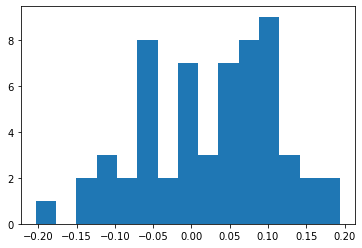

In [11]:
# Calculating the monthly cc returns
AAPL["r"] = (np.log(AAPL["Adj Close"]) - np.log(AAPL["Adj Close"].shift(1)))
# Plotting the cc returns
plt.hist(AAPL['r'], bins=15)
plt.show()

In [12]:
# We calculate the mean of the cc returns
AAPL_mean = AAPL['r'].mean()
AAPL_mean

0.022998402961812832

In [13]:
# We calculate the std of the group
AAPL_var = AAPL['r'].var()
AAPL_var

0.007557697258452519

## MSFT

In [14]:
# Collecting the real data from returns of MSFT from July 2019 until July 2022 monthly
MSFT = pdr.get_data_yahoo("MSFT", start = "2017-07-01", end = "2022-05-31", interval = "m")
MSFT.tail()

High         Low        Open       Close       Volume  \
Date                                                                      
2022-02-01  315.119995  271.519989  310.410004  298.790009  697050600.0   
2022-03-01  315.950012  270.000000  296.399994  308.309998  734334200.0   
2022-04-01  315.109985  270.000000  309.369995  277.519989  627343400.0   
2022-05-01  290.880005  246.440002  277.709991  271.869995  742902000.0   
2022-06-01  277.690002  241.509995  275.200012  256.829987  621372300.0   

             Adj Close  
Date                    
2022-02-01  296.850525  
2022-03-01  306.942047  
2022-04-01  276.288666  
2022-05-01  270.663757  
2022-06-01  256.285980

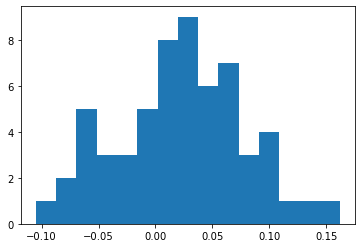

In [15]:
# Calculating the monthly cc returns
MSFT["r"] = np.log(MSFT["Adj Close"]) - np.log(MSFT["Adj Close"].shift(1))
# Plotting the cc returns
plt.hist(MSFT["r"], bins = 15)
plt.show()

In [16]:
# Calculating the mean of the cc returns
MSFT_mean = MSFT["r"].mean()
MSFT_mean

0.022500242590546424

In [17]:
# Calculating the standard deviation of the cc returns
MSFT_var = MSFT["r"].var()
MSFT_var

0.003242120231135954

## Calculating the t-statistic

t = ((mean(r_AAPL) - mean(r_MSFT) - 0) / se  => Remember that the standard error is the standard deviation of the variable of study.

Then:
t = ((mean(r_AAPL) - mean(r_MSFT) - 0) / SD(mean(r_APPL) - mean(r_MSFT)) => The standard deviation can be calculated with the squared root of the variance of this difference

Then:
t = ((mean(r_AAPL) - mean(r_MSFT) - 0) / sqrt((1/N)(Var(r_AAPL) + Var(r_MSFT)))

In [18]:
# Calculating the t-statisitc
t = (AAPL_mean - MSFT_mean -0) / np.sqrt((1 / MSFT["r"].count()) * (AAPL_var + MSFT_var))
t

0.036820270446051045

SINCE THE RESULT OF THE T-STATISTIC IS THAT THE DIFFERENCE BETWEEN THE TWO MEANS IS 0.037 STANDARD DEVIATIONS, WE CANNOT DETERMINE THAT NEITHER OF THE HYPOTHESIS ARE CONFIRMED. 

# 4 Measures of linear relationship
 Imagine we want to see whether there is a relationship between the OIL price and the Microsoft stock price. The S&P500 is an index that represents the 500 bigest US companies, which is a good representation of the US financial market. We will use monthly data for the last 3-4 years.

In [19]:
import pandas as pd
import yfinance as yf
import matplotlib

In [20]:
# We download price data for Microsoft and the S&P500 index:
prices=yf.download(tickers="MSFT ^GSPC", start="2019-01-01",interval="1mo")
# We select Adjusted closing prices and drop any row with NA values:
adjprices = prices['Adj Close'].dropna()

[*********************100%***********************]  2 of 2 completed


Unfortunately, the range of stock prices and market indexes can vary a lot, so this makes difficult to compare price movements in one plot. For example, if we plot the MSFT prices and the S&P500:

In [21]:
plt.clf()
adjprices.plot(y=['MSFT','^GSPC'])
plt.show()



<Figure size 432x288 with 0 Axes>

It looks like the GSPC has had a better performance, but this is misleading since both investment have different range of prices.

When comparing the performance of 2 or more stock prices and/or indexes, it is a good idea to generate an index for each series, so that we can emulate how much $1.00 invested in each stock/index would have moved over time. We can divide the stock price of any month by the stock price of the first month to get a growth factor:

In [22]:
adjprices['iMSFT'] = adjprices['MSFT'] / adjprices['MSFT'][0]
adjprices['iGSPC'] = adjprices['^GSPC'] / adjprices['^GSPC'][0]
print(adjprices['iGSPC'].head(), adjprices['iMSFT'].head())

Date
2019-01-01    1.000000
2019-02-01    1.029729
2019-03-01    1.048186
2019-04-01    1.089394
2019-05-01    1.017736
Name: iGSPC, dtype: float64 Date
2019-01-01    1.000000
2019-02-01    1.072776
2019-03-01    1.134192
2019-04-01    1.255940
2019-05-01    1.189392
Name: iMSFT, dtype: float64


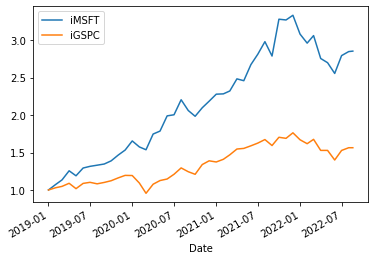

In [23]:
# Plotting the 2 new indexes over timeplt.clf()
adjprices.plot(y=['iMSFT','iGSPC'])
plt.show()

Now we calculate continuously compounded monthly returns. With pandas most of the data management functions works row-wise. In other words, operations are performed to all columns by row:

In [24]:
r = np.log(adjprices) - np.log(adjprices.shift(1))
# Dropping rows with NA values (the first month will have NAs)
r = r.dropna()
# Selecting only 2 columns (out of the 4 columns):
r = r[['MSFT','^GSPC']]
# Renameing the column names:
r.columns = ['MSFT','GSPC']
r.head()

MSFT      GSPC
Date                          
2019-02-01  0.070250  0.029296
2019-03-01  0.055671  0.017766
2019-04-01  0.101963  0.038560
2019-05-01 -0.054442 -0.068041
2019-06-01  0.083538  0.066658

GSPC stands for Global Standard & Poors Composite, which is the S&P500 index. We start with a scatter plot to see whether there is a linear relationship between the MSFT returns and the GSPC returns:

<Figure size 432x288 with 0 Axes>

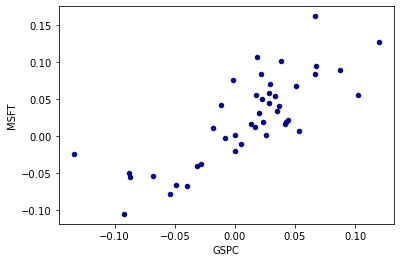

In [25]:
plt.clf()
r.plot.scatter(x='GSPC', y='MSFT',c='DarkBlue')
plt.show()

THIS PLOTTING LOOKS A LINEAR RELATIONSHIP BETWEEN THE MSFT AND GSPC CC RETURNS. NORMALLY THE GSPC HAS A LOWER CC RETURN THAN THE MSFT CC RETURN.

<Figure size 432x288 with 0 Axes>

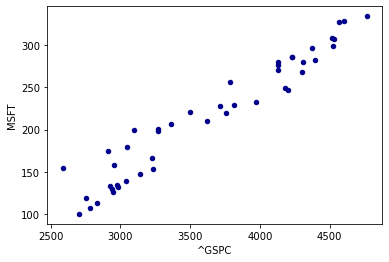

In [26]:
plt.clf()
adjprices.plot.scatter(x='^GSPC', y='MSFT',c='DarkBlue')
plt.show()

USING THE PRICES CONVERYS SHOWS AN APPARENT STRONG LINEAR RELATIONSHOP COMPARED TO THE ABOVE USING CC Stock returns are variables that usually does NOT grow over timeRETURNS.

Stock returns are variables that usually does NOT grow over time

<Figure size 432x288 with 0 Axes>

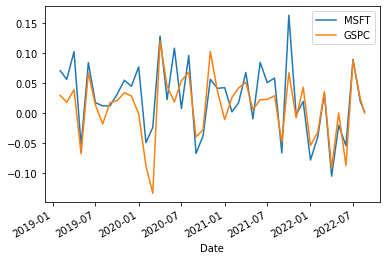

In [27]:
plt.clf()
r.plot(y=['MSFT','GSPC'])
plt.show()

### 3.1 Covariance

In [28]:
# Calculating the covariance
cov_r = r.cov()
print("Covariance cc returns of MSFT and GSPC: ", cov_r)
cov_adj_prices = adjprices.cov()
print("Covariance adjusted prices of MSFT and GSPC: ", cov_adj_prices)

Covariance cc returns of MSFT and GSPC:            MSFT      GSPC
MSFT  0.003475  0.002455
GSPC  0.002455  0.002773
Covariance adjusted prices of MSFT and GSPC:                 MSFT          ^GSPC       iMSFT       iGSPC
MSFT    4873.022956   44390.476193   48.571074   16.415989
^GSPC  44390.476193  433328.052965  442.454948  160.248525
iMSFT     48.571074     442.454948    0.484124    0.163624
iGSPC     16.415989     160.248525    0.163624    0.059261


# 4.3 Calculating covariance and correlation
We can program the covariance of 2 variables according to the formula:

In [29]:
msft_mean = r['MSFT'].mean()
gspc_mean = r['GSPC'].mean()
N = r['GSPC'].count()
sum_of_prod = ((r['MSFT'] - msft_mean) * (r['GSPC'] - gspc_mean) ).sum()  
cov = sum_of_prod / (N-1)
cov

0.002454701128658448

We have the numpy function cov to calculate the covariance:

In [30]:
covm = np.cov(r['MSFT'],r['GSPC'])
covm

array([[0.00347497, 0.0024547 ],
       [0.0024547 , 0.00277328]])

The cov function calculates the covariance matrix using both returns. We can find the covariance in the non-diagonal elements, which will be the same values since the covariance matrix is symetric.

The diagonal values have the variances of each return since the covariance of one variable with itself is actually its variance (Cov(X,X) = Var(X) ) .

Then, to extract the covariance between MSFT and GSPC returns we can extract the element in the row 1 and column 2 of the matrix:

In [31]:
cov = covm[0,1]
cov

0.002454701128658448

We can use the corrcoef function of numpy to calculate the correlation matrix:

In [32]:
corr = np.corrcoef(r['MSFT'],r['GSPC'])
corr

array([[1.        , 0.79072687],
       [0.79072687, 1.        ]])

The correlation matrix will have +1 in its diagonal since the correlation of one variable with itself is +1. The non-diagonal value will be the actual correlation between the corresponding 2 variables (the one in the row, and the one in the column).

We could also manually calculate correlation using the previous covariance:

In [33]:
corr2 = cov / (r['MSFT'].std() * r['GSPC'].std())
corr2

0.7907268732031433

We can use the scipy pearsonr function to calculate correlation and also the 2-tailed pvalue to see whether the correlation is statistically different than zero:

In [34]:
from scipy.stats import pearsonr
corr2 = pearsonr(r['MSFT'],r['GSPC'])
corr2

PearsonRResult(statistic=0.7907268732031432, pvalue=1.708313079103979e-10)

The pvalue is almost zero (1.71 * 10^-10) . MSFT and GSPC returns have a positive and very significant correlation (at the 99.9999…% confidence level).